In [2]:
import pandas as pd
import scipy as sp
import sklearn as skl
import numpy as np
import matplotlib as mtplt
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline
import tensorflow as tf

In [3]:
bdmg = pd.read_csv('../files/blade_damage_assessment.csv', low_memory=False)
#bdmgtest = pd.read_csv('../files/blade_damage_assessment_test.csv', low_memory=False)

In [4]:
bdmg.head(100)

,engine_id,customer,engine_type,category,damage,flight_id,t_1,t_2,t_3,t_4,t_oil,p_oil,vibrations_2,vibrations_4,core_speed,fan_speed,thrust
0,700000,ACC,EX-50B,non-failed,38,1,27.169333,97.409398,568.554307180454,800.617771526119,73.664163,59.755336,0.0844030348911414,0.288484308226124,103.988490040037,86.759646,43824.077117
1,700000,ACC,EX-50B,non-failed,38,2,34.423444,131.146137,709.525734761479,904.861162536342,83.995234,91.238090,0.11583599227328,0.260483903090653,110.245548851895,92.174964,48131.620917
2,700000,ACC,EX-50B,non-failed,38,3,21.498867,95.264770,554.715309731843,779.022122640642,88.876758,99.558113,0.146035417636678,0.283297051916144,103.556756846575,88.105862,43676.985766
3,700000,ACC,EX-50B,non-failed,38,4,19.168106,82.892583,526.308476851884,757.484591914129,75.986135,102.696245,0.805832251423062,0.139379412491953,102.115886237848,85.823801,42946.711363
4,700000,ACC,EX-50B,non-failed,38,5,15.651451,88.250109,639.345044901446,814.660706963478,83.866920,96.889143,0.314611446543913,-0.00690196872612958,107.04135764277,90.942846,46685.678299
5,700000,ACC,EX-50B,non-failed,38,6,20.463081,85.100688,567.902563068437,783.804020777091,69.621085,91.747124,0.704165065360741,0.41780934415836,103.567161497861,86.295968,44118.760860
6,700000,ACC,EX-50B,non-failed,38,7,12.376685,71.775392,488.533101413398,717.777760295433,80.188848,82.096121,0.389231110637154,0.0342362246696857,100.371435939811,85.191278,42121.265456
7,700000,ACC,EX-50B,non-failed,38,8,25.668500,92.255895,610.980478469957,822.387934739722,58.826282,113.501810,0.576283500673292,0.177090323658496,105.24743844542,86.332641,45228.387773
8,700000,ACC,EX-50B,non-failed,38,9,29.245210,97.910588,573.073678472262,808.14770201799,67.831530,81.381721,0.339058900389004,0.367389655953754,104.132521960154,86.306846,43850.762690
9,700000,ACC,EX-50B,non-failed,38,10,29.829992,95.742349,595.521826192474,822.167037248614,56.571062,63.081157,0.256784093890038,0.479504650201366,104.720266280022,85.744344,44503.267853


In [5]:
#pre clean - all na
totorg = bdmg.shape[0]
org= bdmg.shape[0]
bdmg.dropna(how='all') #drop all rows that all columns are NA
fin = bdmg.shape[0]
del1 = org - fin
print('deleted rows'+ str(del1))

deleted rows0


In [6]:
# data clean 1 - temperatures
org= bdmg.shape[0]
#bdmg["t_3"] = bdmg["t_3"].astype(str).convert_objects(convert_numeric=True)
bdmg["t_3"] = pd.to_numeric(bdmg["t_3"],errors="coerce")
bdmg["t_4"] = pd.to_numeric(bdmg["t_4"],errors="coerce")
bdmg.dropna(subset=['t_1'])
bdmg.dropna(subset=['t_2'])
bdmg.dropna(subset=['t_3'])
bdmg.dropna(subset=['t_4'])

bdmg = bdmg.drop(bdmg[bdmg.t_1 < -273].index)
bdmg = bdmg.drop(bdmg[bdmg.t_2 < -273].index)
bdmg = bdmg.drop(bdmg[bdmg.t_3 < -273].index)
bdmg = bdmg.drop(bdmg[bdmg.t_4 < -273].index)
bdmg = bdmg.drop(bdmg[bdmg.t_oil < -273].index)
fin = bdmg.shape[0]
del2 = org - fin
print('deleted rows'+ str(del2))

deleted rows299


In [7]:
#data clean 2 - speeds & thrust
org= bdmg.shape[0]

bdmg['core_speed'] = pd.to_numeric(bdmg['core_speed'],errors='coerce')
bdmg['fan_speed'] = pd.to_numeric(bdmg['core_speed'],errors='coerce')
bdmg['thrust'] = pd.to_numeric(bdmg['thrust'],errors='coerce')
bdmg.dropna(subset=['core_speed'])
bdmg.dropna(subset=['fan_speed'])
bdmg.dropna(subset=['thrust'])

bdmg = bdmg.drop(bdmg[bdmg.core_speed < 0].index)
bdmg = bdmg.drop(bdmg[bdmg.fan_speed < 0].index)
bdmg = bdmg.drop(bdmg[bdmg.thrust < 0].index)

fin = bdmg.shape[0]
del3 = org -fin
print('deleted rows'+ str(del3))

deleted rows186


In [8]:
#data clean 3 - preasure
org= bdmg.shape[0]

bdmg['p_oil'] = pd.to_numeric(bdmg['p_oil'],errors='coerce')
bdmg.dropna(subset=['p_oil'])

bdmg = bdmg.drop(bdmg[bdmg.p_oil < 0].index)

fin = bdmg.shape[0]
del4 = org -fin
print('deleted rows'+ str(del4))

deleted rows0


In [9]:
#data clean 4 - vibrations
org= bdmg.shape[0]

bdmg['vibrations_2'] = pd.to_numeric(bdmg['vibrations_2'],errors='coerce')
bdmg.dropna(subset=['vibrations_2'])
bdmg['vibrations_4'] = pd.to_numeric(bdmg['vibrations_4'],errors='coerce')
bdmg.dropna(subset=['vibrations_4'])

fin = bdmg.shape[0]
del5 = org -fin
print('deleted rows'+ str(del5))

print('deleted rows' + str(del1+del2+del3+del4+del5))
print('percentage deleted rows '+str(((del1+del2+del3+del4+del5)/totorg)*100 ) +'%')

deleted rows0
deleted rows485
percentage deleted rows 0.02472728607583578%


In [10]:
# categorizar columnas
# engine type
bdmg.loc[bdmg['engine_type'] == 'EX-50A','engine_type'] = 1 # EX-50A => 1
bdmg.loc[bdmg['engine_type'] == 'EX-50B','engine_type'] = 2 # EX-50A => 2
#failed
bdmg.loc[bdmg['category'] == 'failed','category'] = 1 # failed => 1
bdmg.loc[bdmg['category'] == 'non-failed','category'] = 0 # non failed => 0

In [12]:
engID = (pd.Series.value_counts(bdmg['engine_id']))
engTyp = (pd.Series.value_counts(bdmg['engine_type']))
custName = (pd.Series.value_counts(bdmg['customer']))
flightID = (pd.Series.value_counts(bdmg['flight_id']))

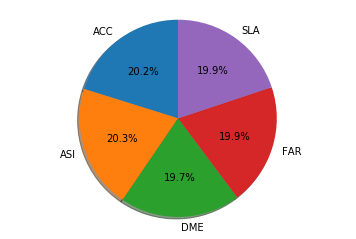

In [13]:
labels = 'ACC', 'ASI', 'DME', 'FAR', 'SLA'


sizes = [custName['ACC'], 
         custName['ASI'],
         custName['DME'],
         custName['FAR'],
         custName['SLA']
        ]

explode = (0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [14]:

print (custName)
#print(bdmg[(bdmg['engine_type']==2) & (bdmg['customer']=='ACC')])
print(bdmg[(bdmg['engine_type']==1) & (bdmg['customer']=='DME')])

ASI    398268
ACC    395756
FAR    390478
SLA    389802
DME    386607
Name: customer, dtype: int64
         engine_id customer engine_type category  damage  flight_id  \
39854       700034      DME           1        0      25          1   
39855       700034      DME           1        0      25          2   
39856       700034      DME           1        0      25          3   
39857       700034      DME           1        0      25          4   
39858       700034      DME           1        0      25          5   
39859       700034      DME           1        0      25          6   
39860       700034      DME           1        0      25          7   
39861       700034      DME           1        0      25          8   
39862       700034      DME           1        0      25          9   
39863       700034      DME           1        0      25         10   
39864       700034      DME           1        0      25         11   
39865       700034      DME           1        0 

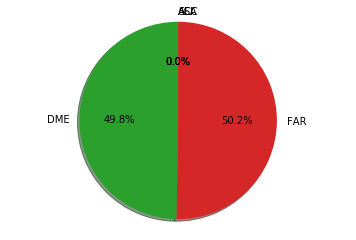

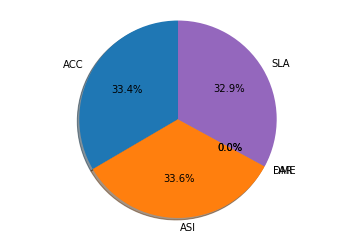

Total fallidos vs no fallidos


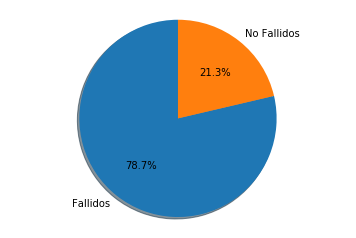

tipo A


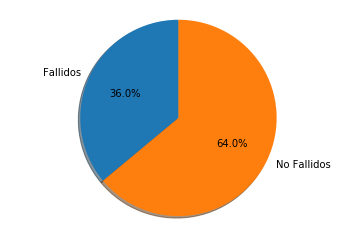

tipo B


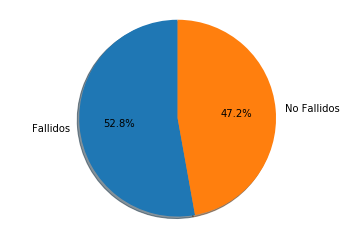

In [15]:
def graficamela(data, explode, labels):
    fig1, ax1 = plt.subplots()
    ax1.pie(data, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

labels = 'ACC', 'ASI', 'DME', 'FAR', 'SLA'
labels_f = 'Fallidos', 'No Fallidos'

datas = [
    bdmg[(bdmg['engine_type']==1) & (bdmg['customer']=='ACC')],
    bdmg[(bdmg['engine_type']==1) & (bdmg['customer']=='ASI')],
    bdmg[(bdmg['engine_type']==1) & (bdmg['customer']=='DME')],
    bdmg[(bdmg['engine_type']==1) & (bdmg['customer']=='FAR')],
    bdmg[(bdmg['engine_type']==1) & (bdmg['customer']=='SLA')],
    bdmg[(bdmg['engine_type']==2) & (bdmg['customer']=='ACC')],
    bdmg[(bdmg['engine_type']==2) & (bdmg['customer']=='ASI')],
    bdmg[(bdmg['engine_type']==2) & (bdmg['customer']=='DME')],
    bdmg[(bdmg['engine_type']==2) & (bdmg['customer']=='FAR')],
    bdmg[(bdmg['engine_type']==2) & (bdmg['customer']=='SLA')],
    bdmg[bdmg['category']==0],
    bdmg[bdmg['category']==1],
    bdmg[(bdmg['category']==0) & (bdmg['engine_type']==1)],
    bdmg[(bdmg['category']==0) & (bdmg['engine_type']==2)],
    bdmg[(bdmg['category']==1) & (bdmg['engine_type']==1)],
    bdmg[(bdmg['category']==1) & (bdmg['engine_type']==2)],
]

data_1 = []
data_2 = []
data_3 = []
data_4 = []
data_5 = []

i = 0

for data in datas:
    if 5 > i:
        data_1.append(data['engine_id'].count())
    elif 10 > i:
        data_2.append(data['engine_id'].count())
    elif 12 > i:
        data_3.append(data['engine_id'].count())
    elif 14 > i:
        data_4.append(data['engine_id'].count())
    elif 16 > i:
        data_5.append(data['engine_id'].count())
    i += 1

explode = (0, 0, 0, 0, 0) 
explode_f = (0, 0) 

graficamela(data_1, explode, labels)
graficamela(data_2, explode, labels)
print("Total fallidos vs no fallidos")
graficamela(data_3, explode_f, labels_f)
print('tipo A')
graficamela(data_4, explode_f, labels_f)
print('tipo B')
graficamela(data_5, explode_f, labels_f)


In [16]:
b1g = bdmg[(bdmg['engine_type']==1) & (bdmg['category']==0)]
b1f = bdmg[(bdmg['engine_type']==1) & (bdmg['category']==1)]
b2g = bdmg[(bdmg['engine_type']==2) & (bdmg['category']==0)]
b2f = bdmg[(bdmg['engine_type']==2) & (bdmg['category']==1)]

'''
print("engine 1")
print("min no fallo " + str(b1g['damage'].min()))
print("max no fallo " + str(b1g['damage'].max()))
print("min si fallo " + str(b1f['damage'].min()))
print("max si fallo " + str(b1f['damage'].max()))
print("engine 2")
print("min no fallo " + str(b2g['damage'].min()))
print("max no fallo " + str(b2g['damage'].max()))
print("min si fallo " + str(b2f['damage'].min()))
print("max no fallo " + str(b2f['damage'].max()))
'''
temp1 = pd.Series.value_counts(b1g['engine_type'])[1]
temp2 = pd.Series.value_counts(b1f['engine_type'])[1]
temp3 = b2g['engine_id'].count()
temp4 = b2f['engine_id'].count()
b1gmin = b1g['damage'].min()
b1gmax = b1g['damage'].max()
b1fmin = b1f['damage'].min()
b1fmax = b1f['damage'].max()
b2gmin = b2g['damage'].min()
b2gmax = b2g['damage'].max()
b2fmin = b2f['damage'].min()
b2fmax = b2f['damage'].max()

tabla1 = b1g.groupby(['damage']).mean()
# print(tabla1[['t_1','t_2','t_3','t_4','t_oil','p_oil','fan_speed','core_speed']])
tabla2 = b1f.groupby(['damage']).mean()
# print(tabla2[['t_1','t_2','t_3','t_4','t_oil','p_oil','fan_speed','core_speed']])

grafica damage vs t_1


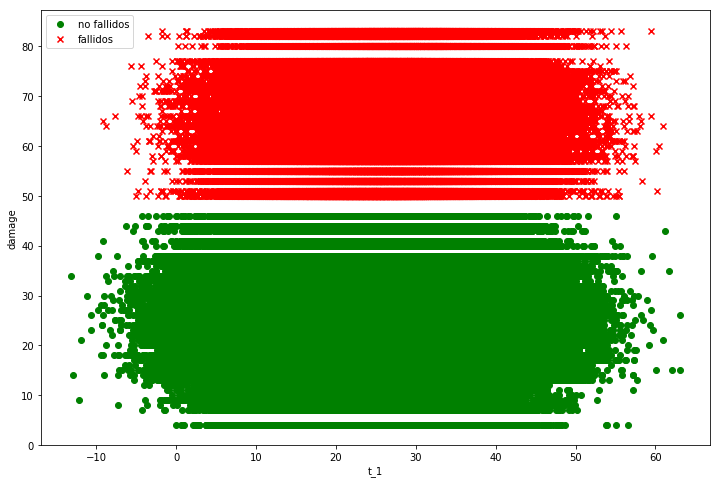

In [17]:
nonf = bdmg[bdmg["category"].isin([0])]
yesf = bdmg[bdmg["category"].isin([1])]

print("grafica damage vs t_1")
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(nonf["t_1"], nonf["damage"], c='g', marker='o', label='no fallidos')
ax.scatter(yesf["t_1"], yesf["damage"], c='r', marker='x', label='fallidos')
ax.legend()
ax.set_xlabel("t_1")
ax.set_ylabel("damage")



grafica damage vs t_2


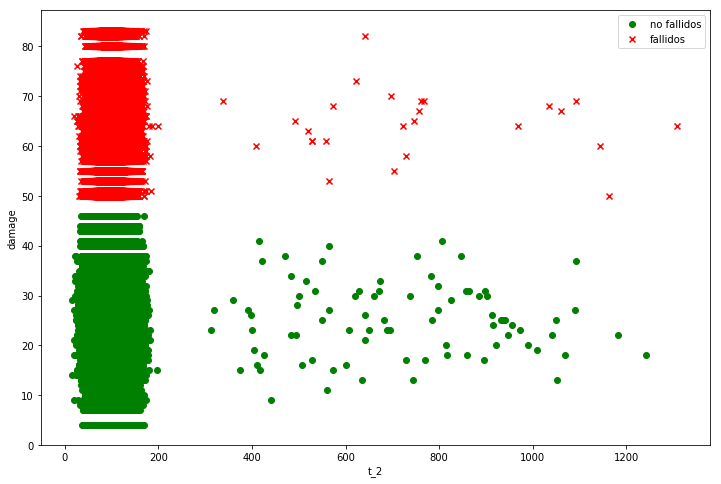

In [18]:
print("grafica damage vs t_2")
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(nonf["t_2"], nonf["damage"], c='g', marker='o', label='no fallidos')
ax.scatter(yesf["t_2"], yesf["damage"], c='r', marker='x', label='fallidos')
ax.legend()
ax.set_xlabel("t_2")
ax.set_ylabel("damage")



grafica damage vs t_3


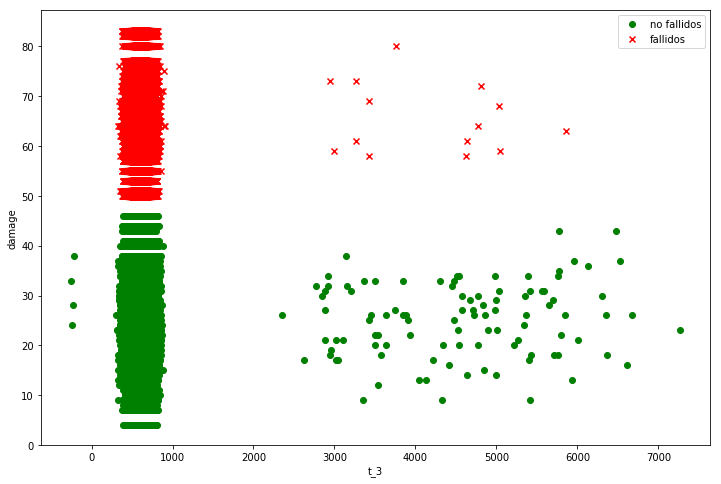

In [19]:
print("grafica damage vs t_3")
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(nonf["t_3"], nonf["damage"], c='g', marker='o', label='no fallidos')
ax.scatter(yesf["t_3"], yesf["damage"], c='r', marker='x', label='fallidos')
ax.legend()
ax.set_xlabel("t_3")
ax.set_ylabel("damage")



grafica damage vs t_4


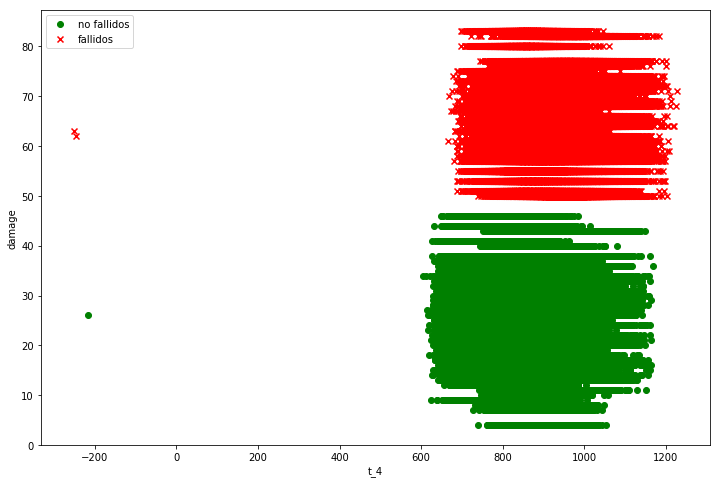

In [20]:
print("grafica damage vs t_4")
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(nonf["t_4"], nonf["damage"], c='g', marker='o', label='no fallidos')
ax.scatter(yesf["t_4"], yesf["damage"], c='r', marker='x', label='fallidos')
ax.legend()
ax.set_xlabel("t_4")
ax.set_ylabel("damage")



grafica damage vs t_oil


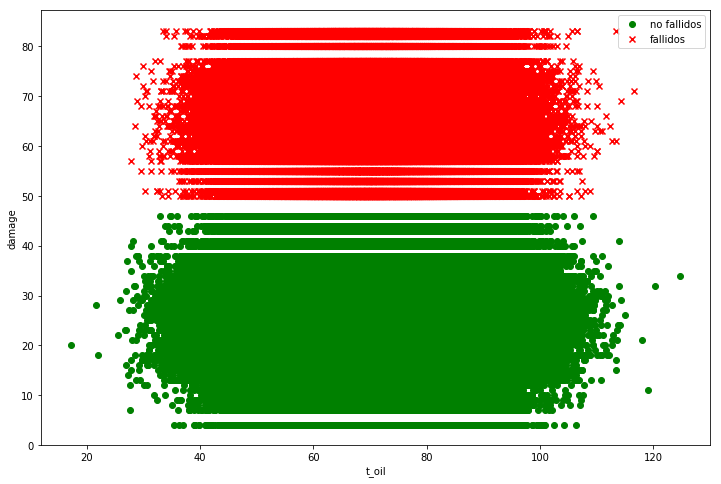

In [21]:
print("grafica damage vs t_oil")
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(nonf["t_oil"], nonf["damage"], c='g', marker='o', label='no fallidos')
ax.scatter(yesf["t_oil"], yesf["damage"], c='r', marker='x', label='fallidos')
ax.legend()
ax.set_xlabel("t_oil")
ax.set_ylabel("damage")



grafica damage vs p_oil


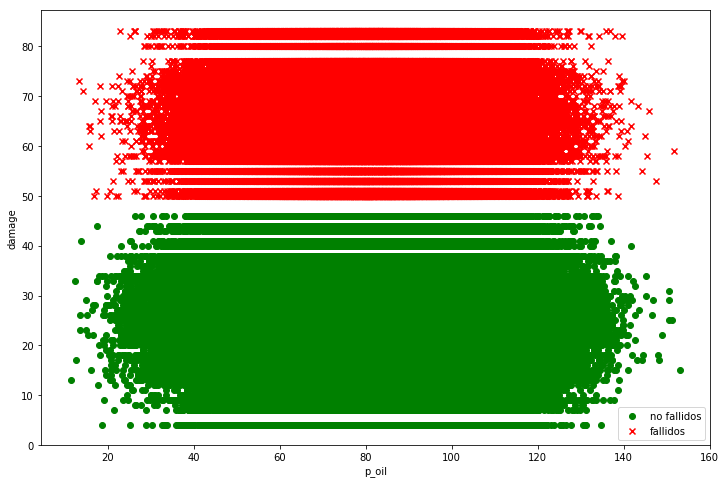

In [22]:
print("grafica damage vs p_oil")
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(nonf["p_oil"], nonf["damage"], c='g', marker='o', label='no fallidos')
ax.scatter(yesf["p_oil"], yesf["damage"], c='r', marker='x', label='fallidos')
ax.legend()
ax.set_xlabel("p_oil")
ax.set_ylabel("damage")

grafica damage vs p_oil


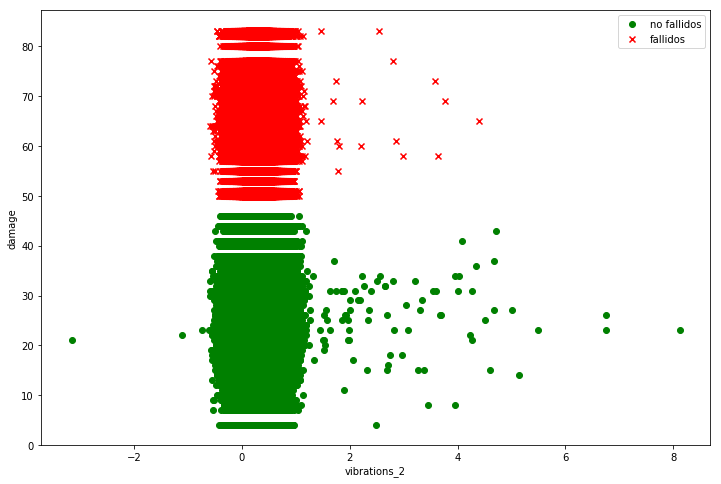

In [23]:
print("grafica damage vs p_oil")
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(nonf["vibrations_2"], nonf["damage"], c='g', marker='o', label='no fallidos')
ax.scatter(yesf["vibrations_2"], yesf["damage"], c='r', marker='x', label='fallidos')
ax.legend()
ax.set_xlabel("vibrations_2")
ax.set_ylabel("damage")

grafica damage vs p_oil


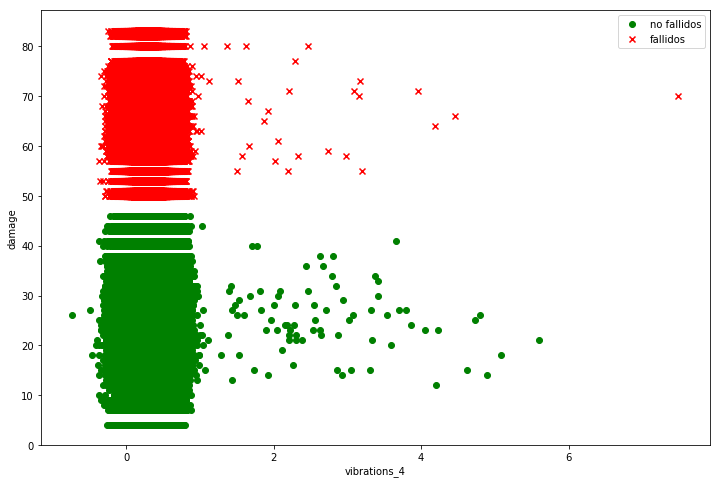

In [24]:
print("grafica damage vs p_oil")
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(nonf["vibrations_4"], nonf["damage"], c='g', marker='o', label='no fallidos')
ax.scatter(yesf["vibrations_4"], yesf["damage"], c='r', marker='x', label='fallidos')
ax.legend()
ax.set_xlabel("vibrations_4")
ax.set_ylabel("damage")

In [25]:
kuz = bdmg[(bdmg['damage']>70)]
kuz

,engine_id,customer,engine_type,category,damage,flight_id,t_1,t_2,t_3,t_4,t_oil,p_oil,vibrations_2,vibrations_4,core_speed,fan_speed,thrust
58352,700065,DME,1,1,73,1,26.322658,98.025073,631.623916,859.132428,70.149246,91.741428,0.428598,0.156023,110.688680,110.688680,44809.008565
58353,700065,DME,1,1,73,2,30.419672,104.477913,607.309513,854.927997,75.109847,93.710878,0.635885,0.430808,109.700421,109.700421,43984.397355
58354,700065,DME,1,1,73,3,36.342834,108.347703,613.075418,871.960439,64.580986,106.200928,0.252247,0.279901,109.836004,109.836004,43866.005361
58355,700065,DME,1,1,73,4,28.609475,107.142681,638.989736,869.728288,78.830563,88.234165,0.110445,0.510779,111.352333,111.352333,44918.476050
58356,700065,DME,1,1,73,5,33.461617,113.125097,647.526417,886.776483,72.803227,78.076031,0.384376,0.369087,111.646776,111.646776,44931.135907
58357,700065,DME,1,1,73,6,35.640572,117.617820,705.430228,930.572227,58.675983,82.820354,0.179489,0.110942,114.413335,114.413335,46516.110442
58358,700065,DME,1,1,73,7,18.228985,69.862035,422.001447,727.363344,75.729899,89.051467,0.407669,0.066267,101.717277,101.717277,40180.072767
58359,700065,DME,1,1,73,8,20.738718,81.062306,588.417257,816.043391,64.506483,69.666929,0.140811,0.577954,108.084552,108.084552,43840.913628
58360,700065,DME,1,1,73,9,41.865865,113.606232,598.641898,874.350940,66.696122,85.084311,0.571121,0.585567,109.425128,109.425128,43231.460998
58361,700065,DME,1,1,73,10,28.722480,101.432295,599.458871,845.558848,76.178432,101.139540,0.537058,0.197765,109.295659,109.295659,43849.192783


grafica damage vs core speed
grafica damage vs fan speed


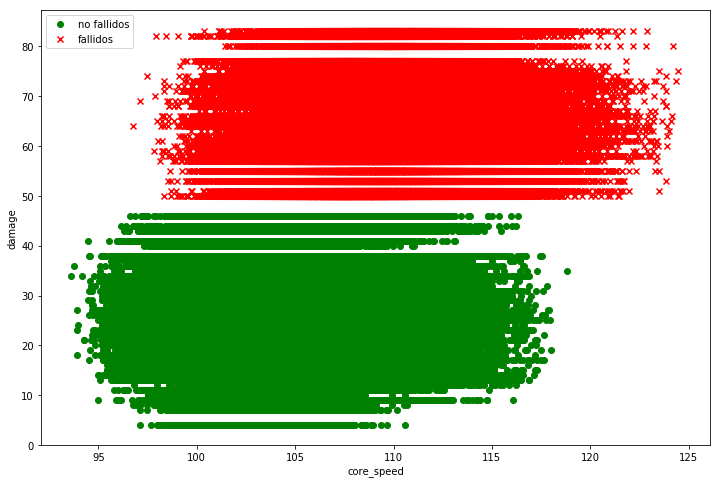

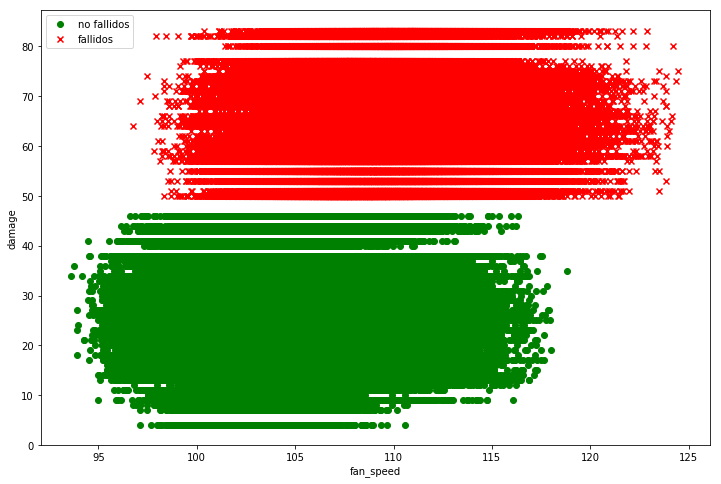

In [26]:
nonf1 = kuz[kuz["category"].isin([0])]
yesf1 = kuz[kuz["category"].isin([1])]

print("grafica damage vs core speed")
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(nonf["core_speed"], nonf["damage"], c='g', marker='o', label='no fallidos')
ax.scatter(yesf["core_speed"], yesf["damage"], c='r', marker='x', label='fallidos')
ax.legend()
ax.set_xlabel("core_speed")
ax.set_ylabel("damage")

print("grafica damage vs fan speed")
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(nonf["fan_speed"], nonf["damage"], c='g', marker='o', label='no fallidos')
ax.scatter(yesf["fan_speed"], yesf["damage"], c='r', marker='x', label='fallidos')
ax.legend()
ax.set_xlabel("fan_speed")
ax.set_ylabel("damage")

grafica damage vs thrust


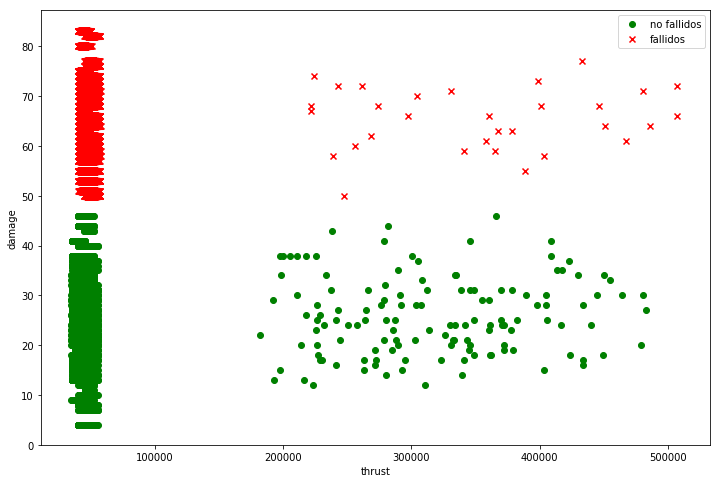

In [34]:
print("grafica damage vs thrust")
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(nonf["thrust"], nonf["damage"], c='g', marker='o', label='no fallidos')
ax.scatter(yesf["thrust"], yesf["damage"], c='r', marker='x', label='fallidos')
ax.legend()
ax.set_xlabel("thrust")
ax.set_ylabel("damage")

In [27]:
#sns.pairplot(bdmg, hue="damage")
#sns.plt.show()

In [81]:
ex_data = bdmg[['t_2','t_4','core_speed','damage', 'category']]

cs = ex_data.shape[1]
X = ex_data.iloc[:,0:cs-1]
Y = ex_data.iloc[:,cs-1:cs]

X = np.array(X.values)
Y = np.array(Y.values)
Teta = np.zeros(4)

In [82]:
X.shape, Y.shape, Teta.shape

((1960911, 4), (1960911, 1), (4,))

In [83]:
def sigmoide(x):
    return 1 / (1 + np.exp(-x))
def costo(Teta, X, Y):
    Teta = np.matrix(Teta)
    X = np.matrix(X)
    Y = np.matrix(Y)
    A = np.multiply(-Y, np.log(sigmoide(X * Teta.T)))
    B = np.multiply((1 - Y), np.log(1 - sigmoide(X * Teta.T)))
    return np.sum(A - B) / (len(X))

def gradient(teta, x, y):
    teta = np.matrix(teta)
    x = np.matrix(x)
    y = np.matrix(y)
    
    parameters = int(teta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoide(x * teta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, x[:,i])
        grad[i] = np.sum(term) / len(x)
    
    return grad

def predict(theta, X):
    probability = sigmoide(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [84]:
#costo(Teta,X,Y)

#gradient(Teta, X, Y)

import scipy.optimize as opt
result = opt.fmin_tnc(func=costo, x0=Teta, fprime=gradient, args=(X, Y))
#result

costo(result[0], X, Y)

nan

In [93]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, Y)]
#print ('correct: {0}'.format(correct))
accuracy = (sum(map(int, correct)) / len(correct))*100
print ('accuracy = {0}%'.format(accuracy))

accuracy = 21.349413614386375%


In [87]:
zain = bdmg[(bdmg['engine_id']== 700920) | (bdmg['engine_id']== 700170)]
zain

,engine_id,customer,engine_type,category,damage,flight_id,t_1,t_2,t_3,t_4,t_oil,p_oil,vibrations_2,vibrations_4,core_speed,fan_speed,thrust
137575,700170,ASI,2,0,17,1,25.784717,89.124206,546.483265,900.003281,70.319736,84.939629,0.373306,0.195641,101.869861,101.869861,47109.250289
137576,700170,ASI,2,0,17,2,25.873008,87.053502,548.564318,901.532547,65.503730,85.331404,0.306931,0.423337,101.855383,101.855383,47140.901536
137577,700170,ASI,2,0,17,3,30.410454,89.162094,586.610275,938.302286,48.226908,89.973905,0.303866,0.434147,103.050951,103.050951,47656.500094
137578,700170,ASI,2,0,17,4,22.197435,76.012523,520.900972,873.644782,59.446098,60.413878,0.156307,0.454932,100.608864,100.608864,46781.312083
137579,700170,ASI,2,0,17,5,24.750393,89.585799,578.993191,918.236585,67.846821,69.600338,0.588520,0.404638,102.975413,102.975413,47681.886226
137581,700170,ASI,2,0,17,7,24.320006,86.891853,521.956763,880.490849,74.961007,81.125195,0.652756,0.402752,101.055680,101.055680,46752.922026
137582,700170,ASI,2,0,17,8,20.769404,70.519954,474.379591,842.274851,60.507264,65.697955,0.602618,0.286116,99.096073,99.096073,46110.953722
137583,700170,ASI,2,0,17,9,35.316733,122.819599,657.244054,999.978070,82.688337,81.646160,0.462866,0.322557,106.506237,106.506237,48782.864400
137584,700170,ASI,2,0,17,10,35.067421,100.012299,564.270323,934.251778,63.916199,69.664889,-0.138681,0.236287,102.706922,102.706922,47148.303770
137585,700170,ASI,2,0,17,11,31.992845,114.623421,650.555448,987.787919,78.463558,96.670603,0.677225,0.147775,106.212973,106.212973,48777.264080


In [88]:
tutzke = bdmg[(bdmg['engine_id']== 701420) | (bdmg['engine_id']== 700747)]
tutzke

,engine_id,customer,engine_type,category,damage,flight_id,t_1,t_2,t_3,t_4,t_oil,p_oil,vibrations_2,vibrations_4,core_speed,fan_speed,thrust
756682,700747,ASI,2,0,33,1,29.732310,108.423859,573.898997,920.287995,91.524567,70.235374,0.140672,0.363846,103.453219,103.453219,47387.994047
756683,700747,ASI,2,0,33,2,34.559398,120.226599,677.411486,1014.131122,74.026151,92.139174,0.156670,0.175231,107.959100,107.959100,49421.807236
756684,700747,ASI,2,0,33,3,38.834221,102.547694,559.076194,933.638162,62.348519,76.829260,0.549368,0.291599,102.625140,102.625140,46827.126567
756685,700747,ASI,2,0,33,4,45.961463,146.343013,699.036547,1053.430311,86.576486,76.901145,0.347303,0.181116,108.602055,108.602055,49360.858119
756686,700747,ASI,2,0,33,5,25.422244,90.474421,680.233888,992.282735,46.630251,85.921321,0.185526,0.250815,107.900696,107.900696,49868.506081
756687,700747,ASI,2,0,33,6,35.632113,113.693291,670.940643,1011.150739,59.359438,74.863288,0.001484,0.339345,107.236030,107.236030,49222.458134
756688,700747,ASI,2,0,33,7,15.945784,73.046597,549.649263,857.364298,69.394911,99.711461,0.333711,0.311160,101.372453,101.372453,47247.687014
756689,700747,ASI,2,0,33,8,28.485600,124.919998,711.353663,1029.322965,96.644008,68.071491,0.661899,0.353355,111.032638,111.032638,50537.568007
756690,700747,ASI,2,0,33,9,28.562559,103.152403,607.770714,942.237743,76.462912,98.586488,-0.034359,0.291313,104.619548,104.619548,48104.793809
756691,700747,ASI,2,0,33,10,18.421738,86.806414,616.402206,916.104878,78.244864,63.600502,0.547892,0.413427,105.069626,105.069626,48584.109215


grafica damage vs core speed
grafica damage vs fan speed


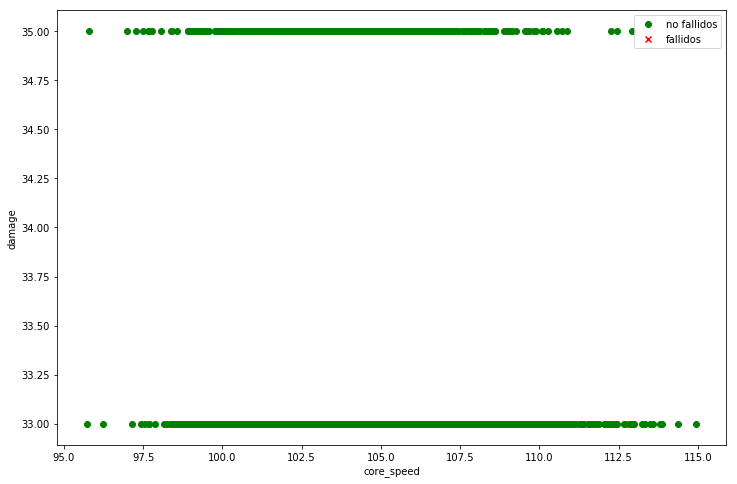

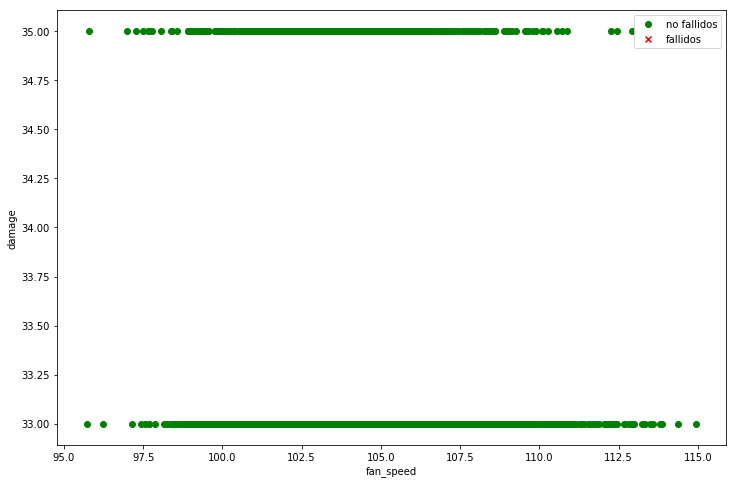

In [89]:
nonf2 = tutzke[tutzke["category"].isin([0])]
yesf2 = tutzke[tutzke["category"].isin([1])]

print("grafica damage vs core speed")
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(nonf2["core_speed"], nonf2["damage"], c='g', marker='o', label='no fallidos')
ax.scatter(yesf2["core_speed"], yesf2["damage"], c='r', marker='x', label='fallidos')
ax.legend()
ax.set_xlabel("core_speed")
ax.set_ylabel("damage")

print("grafica damage vs fan speed")
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(nonf2["fan_speed"], nonf2["damage"], c='g', marker='o', label='no fallidos')
ax.scatter(yesf2["fan_speed"], yesf2["damage"], c='r', marker='x', label='fallidos')
ax.legend()
ax.set_xlabel("fan_speed")
ax.set_ylabel("damage")

In [90]:
totalcancer = bdmg[bdmg.category ==1]
totalcancer

,engine_id,customer,engine_type,category,damage,flight_id,t_1,t_2,t_3,t_4,t_oil,p_oil,vibrations_2,vibrations_4,core_speed,fan_speed,thrust
9886,700008,ASI,2,1,50,1,30.573982,106.074644,662.174188,1038.555791,56.471205,75.760344,0.139062,0.171228,111.482637,111.482637,51718.183017
9887,700008,ASI,2,1,50,2,13.554451,72.297835,543.100761,893.932944,67.740771,68.117771,0.102993,0.159967,105.642823,105.642823,48812.028749
9888,700008,ASI,2,1,50,3,25.781991,100.234787,614.933644,987.040741,70.823447,101.795686,-0.027496,0.088411,109.449272,109.449272,50438.800589
9889,700008,ASI,2,1,50,4,23.015407,95.099921,601.935574,968.884078,72.118197,70.440950,0.375908,0.322313,108.835371,108.835371,50176.200252
9890,700008,ASI,2,1,50,5,10.457119,68.479798,572.839495,904.556718,69.101092,89.740909,0.376777,0.279187,107.021977,107.021977,49817.415351
9891,700008,ASI,2,1,50,6,17.875988,82.347703,624.165426,970.992236,61.519170,105.432742,0.045555,0.219236,109.771983,109.771983,51167.589537
9892,700008,ASI,2,1,50,7,25.542926,96.327140,558.690272,943.343709,75.288355,85.368351,0.325769,0.361154,106.958203,106.958203,48732.219818
9893,700008,ASI,2,1,50,8,25.285383,89.486924,538.603490,928.337123,66.393224,62.248041,0.373702,0.229952,105.947447,105.947447,48174.533051
9894,700008,ASI,2,1,50,9,2.535206,53.253196,478.025369,806.978565,75.205028,67.494949,0.188060,0.347792,102.119246,102.119246,47324.600855
9895,700008,ASI,2,1,50,10,18.697220,96.185192,671.020327,1013.629450,79.036731,74.724096,0.407709,0.093284,113.113726,113.113726,52776.160385


grafica damage vs core speed


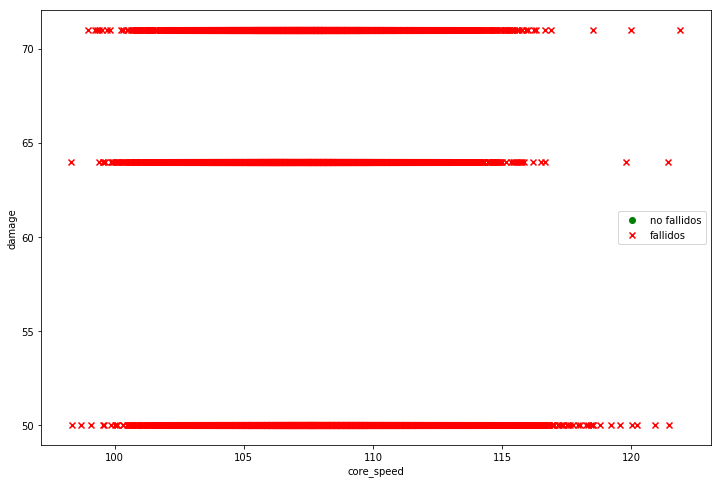

In [91]:
failes = bdmg[(bdmg.engine_id == 700008) | (bdmg.engine_id == 701976) | (bdmg.engine_id == 700086)]
nonf2 = failes[failes["category"].isin([0])]
yesf2 = failes[failes["category"].isin([1])]

print("grafica damage vs core speed")
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(nonf2["core_speed"], nonf2["damage"], c='g', marker='o', label='no fallidos')
ax.scatter(yesf2["core_speed"], yesf2["damage"], c='r', marker='x', label='fallidos')
ax.legend()
ax.set_xlabel("core_speed")
ax.set_ylabel("damage")



In [16]:
from __future__ import print_function
import os
import subprocess
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import datasets

def get_code(tree, feature_names, target_names, spacer_base="    "):
    """
    Los argumentos son:
        tree --> es el árbol de desición de scikit-leant
        feature_names --> Lista de los campos del data set
        target_names --> Lista de nombres de las clases
        spacer_base --> Se usa para definir los espacios
    """
    # hijos de la izquierda
    left = tree.tree_.children_left
    # hijos de la derecha
    right = tree.tree_.children_right
    # limite
    threshold = tree.tree_.threshold
    # campos
    features = [feature_names[i] for i in tree.tree_.feature]
    # valor
    value = tree.tree_.value

    def recurse(left, right, treshold, features, node, depth):
        spacer = spacer_base * depth
        if(treshold[node] != -2):
            print(spacer + "if ( " + features[node] + " <= " + str(treshold[node]) + " ) {")

            if left[node] != -1:
                recurse(left, right, treshold, features, left[node], depth+1)
            print(spacer + "}\n" + spacer + "else {")

            if right[node] != -1:
                recurse(left, right, treshold, features, right[node], depth+1)
            print(spacer + "}")
        else:
            target = value[node]

            for i, v in zip(np.nonzero(target)[1], target[np.nonzero(target)]):
                target_name = target_names[i]
                target_count = int(v)
                print(spacer + "return" + str(target_name) + " ( " + str(target_count) + " examples )")

    recurse(left, right, threshold, features, 0, 0)

def visualize_tree(tree, feature_names):
    """
    Crea una imagen png del arbol

    Los argumentos son:
        tree --> el árbol que se ha ido construyendo
        feature_names --> el nombre de los campos que se usan
    """

    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f, feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("No se puede exportar el archivo a una imágen")

def encode_target(df, target_column):
    """
    Los argumentos son:
        df --> el dataFrame que genera pandas
        target_column --> columna que se hará un int, lo cual produce una nueva columna de destino

    Los valores que regresan son:
        df --> el dataFrame modificado
        targets --> la lista del nombre de los destinos
    """

    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod["Target"] = df_mod[target_column].replace(map_to_int)

    return(df_mod, targets)

print("Localizando los datos...")
df = bdmg.dropna()

print("\n headers")
print(df.head(), end="\n\n")

features = ["t_1", "t_2", "t_3", "t_4", "fan_speed", "core_speed",
            "p_oil","t_oil","vibrations_2","vibrations_4", "engine_type","thrust"]
df, targets = encode_target(df, "category")
y = df["Target"]
X = df[features]

dt = DecisionTreeClassifier(min_samples_split=500000, random_state=111)
dt.fit(X,y)

print("\nArmando el árbol...")
get_code(dt, features, targets)

#print("\nVer los datos originales usando pandas")
#print("\n --df[df['PetalLength'] <= 2.45]]['Name'].unique(): ", df[df['PetalLength'] <= 2.45]['Name'].unique(), end="\n\n")

visualize_tree(dt, features)


Localizando los datos...

 headers
   engine_id customer engine_type category  damage  flight_id        t_1  \
0     700000      ACC           2        0      38          1  27.169333   
1     700000      ACC           2        0      38          2  34.423444   
2     700000      ACC           2        0      38          3  21.498867   
3     700000      ACC           2        0      38          4  19.168106   
4     700000      ACC           2        0      38          5  15.651451   

          t_2         t_3         t_4      t_oil       p_oil  vibrations_2  \
0   97.409398  568.554307  800.617772  73.664163   59.755336      0.084403   
1  131.146137  709.525735  904.861163  83.995234   91.238090      0.115836   
2   95.264770  554.715310  779.022123  88.876758   99.558113      0.146035   
3   82.892583  526.308477  757.484592  75.986135  102.696245      0.805832   
4   88.250109  639.345045  814.660707  83.866920   96.889143      0.314611   

   vibrations_4  core_speed   fan_speed

# conclusiones:

## data cleansing
1. Quitar todas las filas cullas columnas unicamente eran na
2. Convertir en numericos todas las temperaturas y eliminar las que eran na y menores al 0 absoluto
3. Convertir a numerico las velocidades y quitar todas las negativas 
4. Convertir a numerica y quitar las presiones negativas del aceite
5. Convertir a numericas las vibraciones y quitar los na.

la cantidad de filas eliminadas es del 0.024% del total por lo que podemos suponer que la eliminacion de dichas no afecta al data set 

## Descision tree
con el arbol de deciciones nos percatamos de que nuestra hipotesis inicial de que *fan_speed* y *core_speed* eran las varaibles mas importantes no era del todo incorrecta. 
el arbol nos arrojo los resultados de que las varaibles mas importante son
* core_speed
* thrust 
* t_3
    * fan_speed

## Data Mining & Analytics
1. Todas las aerolineas tienen entre 19.7% y 20.3% de los motores
2. De todos los modelos EX-50A DME tiene el 49.8% y FAR el 50.2%
3. De todos los modelos EX-50B ACC tiene el 33.4%, SLA tiene el 32.9% y ASI 33.6%
4. De todos los motores el 78.7% falló
5. Del modelo EX-50A el 36% falló
6. Del modelo EX-50B el 53.8 falló
7. La temperatura no parece ser un factor determinante para definir si un motor falla
8. Las variables core_speed y fan_speed parecen tener una influencia mayor en la falla de los motores
9. Cuando se le exige más velocidad al motor es cuando falla, las razones para pedirle más velocidad a los moteores puden ser: la ruta exige mucho ascenso, el viento viene de frente a los aviones, vienen muy cargados los aviones,las condiciones de despegue no son optimas,

## General
1. Los datos son más históricos que un conjunto de datos vuelos
2. Por cada motor era lo mismo su categoria y daño
